# **Data Analysis in Python for R Users — Python**

# 0. Environment Setup

#### 1. Loading a library

In [1]:
# Python uses import() for libraries 
import pandas as pd

# Note: For installing {pyjanitor} and {siuba}
# conda install -c conda-forge pyjanitor siuba
# conda install plotnine statsmodels geopandas

#### 2. Defining custom functions

In [ ]:
# Define a custom function affiche() for cleanly printing tables
import re
import math

def affiche(df, align="left", na_color="\033[91;3m", theme="newspaper"):
    """
    Display a pandas DataFrame with formatted table borders and styling.
    
    Args:
        df: pandas DataFrame to display
        align: text alignment ("left", "center", "right")
        na_color: ANSI color code for NaN values
        theme: border theme ("newspaper")
    """
    
    # Error handling
    if df.shape[1] == 0 or df.shape[0] == 0:
        msg = "That table doesn't exist!"
        width = len(msg)
        top = f"╔{'═' * (width + 2)}╗"
        mid = f"║ {msg} ║"
        bot = f"╚{'═' * (width + 2)}╝"
        print(f"{top}\n{mid}\n{bot}")
        return df
    
    # Theme setup
    if theme == "newspaper":
        border = {
            "h": "═", "v": "║",
            "tl": "╔", "tr": "╗",
            "bl": "╚", "br": "╝",
            "jn": "╬",
            "l": "╠", "r": "╣",
            "t": "╦", "b": "╩"
        }
    else:
        raise ValueError("Theme not supported. Try 'newspaper'")
    
    # ANSI helpers
    reset = "\033[0m"
    
    def color_na(x):
        if pd.isna(x):
            # Timestamp missing
            if isinstance(x, pd.Timestamp):
                return f"{na_color}NaT{reset}"
            # Everything else (int, bool, str, object, categorical) → NA
            return f"{na_color}NA{reset}"
        return str(x)


    # Width calculator (ignores ANSI codes)
    def display_width(s):
        clean = re.sub(r'\033\[[0-9;]*[mK]', '', str(s))
        return len(clean)
    
    # Data prep
    df_display = df.copy()
    for col in df_display.columns:
        df_display[col] = df_display[col].apply(
            lambda x: color_na("NaN") if pd.isna(x) else str(x)
        )
    
    col_names = list(df_display.columns)
    
    # Column widths
    col_widths = []
    for i, col in enumerate(col_names):
        header_width = display_width(col_names[i])
        data_widths = [display_width(val) for val in df_display.iloc[:, i]]
        col_widths.append(max([header_width] + data_widths))
    
    # Border drawing
    def draw_hline(connector_left, connector_right, cross):
        line = connector_left
        for i, width in enumerate(col_widths):
            line += border["h"] * (width + 2) + cross
        # Replace last cross with right connector
        line = line[:-1] + connector_right
        return line
    
    top_line = draw_hline(border["tl"], border["tr"], border["t"])
    mid_line = draw_hline(border["l"], border["r"], border["jn"])
    bot_line = draw_hline(border["bl"], border["br"], border["b"])
    
    # Header row
    header_parts = [border["v"]]
    for i, name in enumerate(col_names):
        width = col_widths[i]
        pad_total = width - display_width(name)
        
        if align == "left":
            pad_left = 0
        elif align == "center":
            pad_left = math.floor(pad_total / 2)
        elif align == "right":
            pad_left = pad_total
        else:
            pad_left = 0
        
        pad_right = pad_total - pad_left
        formatted_cell = f" {' ' * pad_left}{name}{' ' * pad_right} {border['v']}"
        header_parts.append(formatted_cell)
    
    header = "".join(header_parts)
    
    # Data rows
    data_rows = []
    for row_idx in range(len(df_display)):
        row_parts = [border["v"]]
        for col_idx in range(len(col_names)):
            content = df_display.iloc[row_idx, col_idx]
            width = col_widths[col_idx]
            pad_total = width - display_width(content)
            
            if align == "left":
                pad_left = 0
            elif align == "center":
                pad_left = math.floor(pad_total / 2)
            elif align == "right":
                pad_left = pad_total
            else:
                pad_left = 0
            
            pad_right = pad_total - pad_left
            formatted_cell = f" {' ' * pad_left}{content}{' ' * pad_right} {border['v']}"
            row_parts.append(formatted_cell)
        
        data_rows.append("".join(row_parts))
    
    # Final assembly
    print(top_line)
    print(header)
    print(mid_line)
    print("\n".join(data_rows))
    print(bot_line)

In [3]:
# Define a custom method affiche() for cleanly printing tables
import re
import math

def affiche(self, align="left", na_color="\033[91;3m", theme="newspaper"):
    """
    Display a pandas DataFrame or Series with formatted table borders and styling.
    
    Args:
        self: the DataFrame or Series instance
        align: text alignment ("left", "center", "right")
        na_color: ANSI color code for missing values
        theme: border theme ("newspaper")
    
    Usage:
        df.affiche()
        df["column"].affiche()
    """
    
    df = self

    # Convert Series to DataFrame
    if isinstance(df, pd.Series):
        df = df.reset_index()

    # Handle empty DataFrame
    if df.shape[1] == 0 or df.shape[0] == 0:
        msg = "That table doesn't exist!"
        width = len(msg)
        top = f"╔{'═' * (width + 2)}╗"
        mid = f"║ {msg} ║"
        bot = f"╚{'═' * (width + 2)}╝"
        print(f"{top}\n{mid}\n{bot}")
        return df

    # Border theme
    if theme == "newspaper":
        border = {
            "h": "═", "v": "║",
            "tl": "╔", "tr": "╗",
            "bl": "╚", "br": "╝",
            "jn": "╬",
            "l": "╠", "r": "╣",
            "t": "╦", "b": "╩"
        }
    else:
        raise ValueError("Theme not supported. Try 'newspaper'")

    reset = "\033[0m"

    # Handle color for unique NA types
    def color_na(x):
        if pd.isna(x):
            # Timestamp missing
            if isinstance(x, pd.Timestamp):
                return f"{na_color}NaT{reset}"
            # Everything else (int, bool, str, object, categorical) → NA
            return f"{na_color}NA{reset}"
        return str(x)


    # Width calculator (ignores ANSI codes)
    def display_width(s):
        clean = re.sub(r'\033\[[0-9;]*[mK]', '', str(s))
        return len(clean)

    # Prepare display DataFrame
    df_display = df.copy()
    for col in df_display.columns:
        df_display[col] = df_display[col].apply(color_na)

    col_names = list(df_display.columns)

    # Column widths
    col_widths = []
    for i, col in enumerate(col_names):
        header_width = display_width(col)
        data_widths = [display_width(val) for val in df_display.iloc[:, i]]
        col_widths.append(max([header_width] + data_widths))

    # Draw horizontal line
    def draw_hline(connector_left, connector_right, cross):
        line = connector_left
        for i, width in enumerate(col_widths):
            line += border["h"] * (width + 2) + cross
        line = line[:-1] + connector_right
        return line

    top_line = draw_hline(border["tl"], border["tr"], border["t"])
    mid_line = draw_hline(border["l"], border["r"], border["jn"])
    bot_line = draw_hline(border["bl"], border["br"], border["b"])

    # Header
    header_parts = [border["v"]]
    for i, name in enumerate(col_names):
        width = col_widths[i]
        pad_total = width - display_width(name)

        if align == "left":
            pad_left = 0
        elif align == "center":
            pad_left = math.floor(pad_total / 2)
        elif align == "right":
            pad_left = pad_total
        else:
            pad_left = 0

        pad_right = pad_total - pad_left
        header_parts.append(f" {' ' * pad_left}{name}{' ' * pad_right} {border['v']}")
    header = "".join(header_parts)

    # Data rows
    data_rows = []
    for row_idx in range(len(df_display)):
        row_parts = [border["v"]]
        for col_idx in range(len(col_names)):
            content = df_display.iloc[row_idx, col_idx]
            width = col_widths[col_idx]
            pad_total = width - display_width(content)

            if align == "left":
                pad_left = 0
            elif align == "center":
                pad_left = math.floor(pad_total / 2)
            elif align == "right":
                pad_left = pad_total
            else:
                pad_left = 0

            pad_right = pad_total - pad_left
            row_parts.append(f" {' ' * pad_left}{content}{' ' * pad_right} {border['v']}")
        data_rows.append("".join(row_parts))

    # Print table
    print(top_line)
    print(header)
    print(mid_line)
    print("\n".join(data_rows))
    print(bot_line)

    return None

# Monkey-patch
pd.DataFrame.affiche = affiche
pd.Series.affiche = affiche


In [4]:
# Define a custom function count_table() for generating value counts and percentages
import numpy as np

def count_table(df, column):
    """
    Usage: count_table(df, "column") 
    """
    # Get value counts and convert to DataFrame
    table = df[column].value_counts(dropna = False).reset_index()
    table.columns = [column, "count"]
    
    # Calculate percentages
    table["percent"] = (table["count"] / table["count"].sum() * 100).round(0).astype(int).astype(str) + "%"
    
    # Handle the <1% case
    table["percent"] = np.where(
        (table["percent"] == "0%") & (table["count"] != 0),
        "<1%",
        table["percent"]
    )
    
    return table

In [5]:
# Define a custom method count_table() for generating value counts and percentages
import pandas as pd
import numpy as np

def count_table(self):
    """
    Create a count table with counts and percentages for a Series.
    Usage: series.count_table() or df["column"].count_table()
    """
    # Get value counts and convert to DataFrame
    table = self.value_counts(dropna = False).reset_index()
    table.columns = [self.name or "value", "count"]
    
    # Calculate percentages
    table["percent"] = (table["count"] / table["count"].sum() * 100).round(0).astype(int).astype(str) + "%"
    
    # Handle the <1% case
    table["percent"] = np.where(
        (table["percent"] == "0%") & (table["count"] != 0),
        "<1%",
        table["percent"]
    )
    
    return table

# Monkey patch the method onto Series
pd.Series.count_table = count_table

In [6]:
# Define a custom function count_na() for counting NA values for each column
def count_na(df: pd.DataFrame) -> pd.DataFrame:
    """
    Usage: count_na(df) 
    """
    # Count missing values per column
    na_counts = df.isna().sum()
    
    # Build result table
    result = pd.DataFrame({
        "col": na_counts.index,
        "na_count": na_counts.values
    })
    
    # Add percentage labels 
    result["na_percent"] = result["na_count"].apply(
        lambda x: (
            "0%" if x == 0 
            else "<1%" if x / len(df) <= 0.0099 
            else f"{round(x / len(df) * 100):.0f}%"
        )
    )
    
    # Sort by missing count
    result = result.sort_values(by="na_count", ascending=False).reset_index(drop=True)
    
    return result

In [7]:
# Define a custom method count_na() for counting NA values for each column
def count_na(self):
    """
    Count NA values for each column in a DataFrame, with percentages.
    Usage: df.count_na()
    """
    # Count NAs for each column
    na_counts = self.isna().sum().reset_index()
    na_counts.columns = ["col", "na_count"]

    # Calculate percentages
    na_counts["na_percent"] = (
        (na_counts["na_count"] / len(self) * 100)
        .round(0)
        .astype(int)
        .astype(str) + "%"
    )

    # Handle 0% and <1% cases
    na_counts["na_percent"] = np.where(
        na_counts["na_count"] == 0,
        "0%",
        np.where(
            (na_counts["na_count"] / len(self)) <= 0.0099,
            "<1%",
            na_counts["na_percent"]
        )
    )

    # Sort by missing count
    na_counts = na_counts.sort_values("na_count", ascending=False).reset_index(drop=True)
    return na_counts

# Monkey patch the method onto DataFrame
pd.DataFrame.count_na = count_na

# 1. Simple Data

In [10]:
# We use print for displaying something
print("Hello world!")

Hello world!


In [8]:
# Our assignment operator is the equals sign (=)
x = 10
y = 20

print(x)
print(y)

10
20


In [9]:
# We roughly use the same mathematical operators
z = x * y
print(z)

a = x / y
print(a)

b = x - y
print(b)

200
0.5
-10


In [ ]:
# Let's look at some base Python data types
# NB: Pandas and Numpy introduce data types not present in base Python
k = 1000
name = "Henry"
does_exist = True

# In Python, it prefers we specify print()
print(type(k))
print(type(name))
print(type(does_exist))

<class 'int'>
<class 'str'>
<class 'bool'>


In [30]:
# Missing values operate differently as objects vs as parts of a series
# Note: pd.NA is the NA placeholder for character strings
none_obj = None
na_series = pd.Series(["apple", pd.NA, 25])

print(none_obj)
print(na_series)

None
0    apple
1     <NA>
2       25
dtype: object


# 2. Working with Dataframes

In [27]:
import numpy as np 

# Create a dataframe
# Note: We use np.nan for numeric NAs
df = pd.DataFrame({
    "Name": ["Henry", "Bob", "Joanne", "Steven"], 
    "Age": [22, np.nan, 30, 48],
    "Birthday": ["2003-12-29", "1980-05-15", "1995-01-12", pd.NA]
})

print(df)

     Name   Age    Birthday
0   Henry  22.0  2003-12-29
1     Bob   NaN  1980-05-15
2  Joanne  30.0  1995-01-12
3  Steven  48.0        <NA>


In [31]:
# Display info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      4 non-null      object 
 1   Age       3 non-null      float64
 2   Birthday  3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


In [32]:
# Access a single column by name
df["Birthday"]

0    2003-12-29
1    1980-05-15
2    1995-01-12
3          <NA>
Name: Birthday, dtype: object

In [33]:
# Access the first column by position
# Note: Python starts counting at 0
# Note: _.iloc() uses integer-location based indexing
column_1 = df.iloc[:, 0]

print(column_1)

0     Henry
1       Bob
2    Joanne
3    Steven
Name: Name, dtype: object


In [34]:
# Add a new column
df["Fav_Animal"] = ["Cat", "Penguin", "Sloth", "Dog"]

print(df)

     Name   Age    Birthday Fav_Animal
0   Henry  22.0  2003-12-29        Cat
1     Bob   NaN  1980-05-15    Penguin
2  Joanne  30.0  1995-01-12      Sloth
3  Steven  48.0        <NA>        Dog


In [35]:
# Drop a column
df.drop("Age", axis = 1, inplace = True)

print(df)

     Name    Birthday Fav_Animal
0   Henry  2003-12-29        Cat
1     Bob  1980-05-15    Penguin
2  Joanne  1995-01-12      Sloth
3  Steven        <NA>        Dog


In [36]:
# Convert birthday to a datefield with pd.to_datetime()
df["Birthday"] = pd.to_datetime(df["Birthday"])

df["Birthday"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: Birthday
Non-Null Count  Dtype         
--------------  -----         
3 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 164.0 bytes


# 3. More Advanced Manipulation

#### 1. Reading in data

In [70]:
# Read in the calls for service data
# Note: In Python, certain functions must have their packages named 
cfs = pd.read_csv("./data/calls_for_service_2025_demo.csv")

# Preview the first 10 rows
# Note: Here, _.head() is a method (ie, a function specific to a given type of object)
print(cfs.head(10))

  NOPD_Item Type             TypeText Priority InitialType  \
0  A0000125   94  DISCHARGING FIREARM        1          94   
1  A0000225   20        AUTO ACCIDENT        1          20   
2  A0000325  94F            FIREWORKS       2J         103   
3  A0000425  94F            FIREWORKS       2J         103   
4  A0000525   94  DISCHARGING FIREARM       2C          94   
5  A0000625  107    SUSPICIOUS PERSON        1         107   
6  A0000725  94F            FIREWORKS       1A          94   
7  A0000825   94  DISCHARGING FIREARM        1          94   
8  A0000925   24              MEDICAL       2D          24   
9  A0001025   94  DISCHARGING FIREARM       2C          94   

       InitialTypeText InitialPriority      MapX     MapY  \
0  DISCHARGING FIREARM              2C   3687148   539441   
1        AUTO ACCIDENT              1E   3680718   529326   
2  DISTURBANCE (OTHER)              1C   3707020   561072   
3  DISTURBANCE (OTHER)              1C   3665351   536442   
4  DISCHARGI

In [71]:
# Use our custom affiche() method for better readability
# Note: We granted {pandas} dataframes a new method affiche() for printing tables
cfs.head(10).affiche()

╔═══════════╦══════╦═════════════════════╦══════════╦═════════════╦═════════════════════╦═════════════════╦══════════╦═════════╦════════════════════════════╦════════════════════════════╦════════════════════════════╦════════════════════════════╦═════════════╦════════════════════════╦═══════════════╦══════╦═════════════════════════════╦═════════╦════════════════╦══════════════════════════════════╗
║ NOPD_Item ║ Type ║ TypeText            ║ Priority ║ InitialType ║ InitialTypeText     ║ InitialPriority ║ MapX     ║ MapY    ║ TimeCreate                 ║ TimeDispatch               ║ TimeArrive                 ║ TimeClosed                 ║ Disposition ║ DispositionText        ║ SelfInitiated ║ Beat ║ BLOCK_ADDRESS               ║ Zip     ║ PoliceDistrict ║ Location                         ║
╠═══════════╬══════╬═════════════════════╬══════════╬═════════════╬═════════════════════╬═════════════════╬══════════╬═════════╬════════════════════════════╬════════════════════════════╬════════════════

#### 2. Cleaning column names

In [ ]:
# Load the {pyjanitor} package
# Note: The import call here is different from the actual library name 
import janitor

# Apply the clean_names() method from {pyjanitor}
# Note, {pyjanitor} grants {pandas} dataframes a new method for cleaning names
cfs = cfs.clean_names()

cfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nopd_item        857 non-null    object 
 1   type             857 non-null    object 
 2   typetext         857 non-null    object 
 3   priority         857 non-null    object 
 4   initialtype      857 non-null    object 
 5   initialtypetext  857 non-null    object 
 6   initialpriority  857 non-null    object 
 7   mapx             857 non-null    int64  
 8   mapy             857 non-null    int64  
 9   timecreate       857 non-null    object 
 10  timedispatch     384 non-null    object 
 11  timearrive       617 non-null    object 
 12  timeclosed       857 non-null    object 
 13  disposition      857 non-null    object 
 14  dispositiontext  857 non-null    object 
 15  selfinitiated    857 non-null    object 
 16  beat             848 non-null    object 
 17  block_address   

In [73]:
from siuba import *

# We can select data with select() from {siuba}
# Note: We use the backslash ( \ ) to extend a statement to the next line
# Note: siuba uses the underscore ( _ ) as a placeholder for the column's dataframe
# And we'll use reset_index(), similar to R's ungroup() from {dplyr}
cfs >> select(_.nopd_item) \
    >> head(10) \
    >> _.reset_index() \
    >> _.affiche()

# Note: This is the same as:
# cfs["nopd_item"].head(10).affiche()

╔═══════╦═══════════╗
║ index ║ nopd_item ║
╠═══════╬═══════════╣
║ 0     ║ A0000125  ║
║ 1     ║ A0000225  ║
║ 2     ║ A0000325  ║
║ 3     ║ A0000425  ║
║ 4     ║ A0000525  ║
║ 5     ║ A0000625  ║
║ 6     ║ A0000725  ║
║ 7     ║ A0000825  ║
║ 8     ║ A0000925  ║
║ 9     ║ A0001025  ║
╚═══════╩═══════════╝


In [74]:
# Rename columns (in case they weren't already renamed)
# We'll use rename() from {siuba} 
# Where rename wants "new = _.old"
cfs = cfs >> rename(zip_code = _.zip)

# Check on our 19th column (note: again, Python starts counting at 0)
cfs.columns[18]

'zip_code'

In [75]:
# We're actually going to do some more renaming to match R's {janitor}
cfs = cfs >> rename(
    type_text = _.typetext,
    initial_type = _.initialtype,
    initial_type_text = _.initialtypetext,
    initial_priority = _.initialpriority,
    map_x = _.mapx,
    map_y = _.mapy,
    time_create = _.timecreate, 
    time_dispatch = _.timedispatch,
    time_arrive = _.timearrive,
    time_closed = _.timeclosed,
    disposition_text = _.dispositiontext,
    self_initiated = _.selfinitiated,
    police_district = _.policedistrict
)

# Let's see if our column names match now
cfs.info()

# Note: Looks like there are some differences in data types
# We'll try to get these to line up later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nopd_item          857 non-null    object 
 1   type               857 non-null    object 
 2   type_text          857 non-null    object 
 3   priority           857 non-null    object 
 4   initial_type       857 non-null    object 
 5   initial_type_text  857 non-null    object 
 6   initial_priority   857 non-null    object 
 7   map_x              857 non-null    int64  
 8   map_y              857 non-null    int64  
 9   time_create        857 non-null    object 
 10  time_dispatch      384 non-null    object 
 11  time_arrive        617 non-null    object 
 12  time_closed        857 non-null    object 
 13  disposition        857 non-null    object 
 14  disposition_text   857 non-null    object 
 15  self_initiated     857 non-null    object 
 16  beat               848 non

#### 3. Converting character fields to sentence case

In [76]:
# Acquire character (object) columns with the select_dtypes() method
str_cols = cfs.select_dtypes(include = "object").columns  

# Iterate through each column with str.capitalize() from {pandas}
for col in str_cols:
    cfs[col] = cfs[col].str.capitalize()

In [77]:
# Now we can look at the dispositions and see what they look like
# Dataframes have a method called value_counts() for grouping and counting values
cfs["disposition_text"].value_counts().affiche()

╔═════════════════════════════╦═══════╗
║ disposition_text            ║ count ║
╠═════════════════════════════╬═══════╣
║ Necessary action taken      ║ 436   ║
║ Report to follow            ║ 174   ║
║ Gone on arrival             ║ 170   ║
║ Void                        ║ 36    ║
║ Duplicate                   ║ 31    ║
║ Referred to external agency ║ 6     ║
║ Unfounded                   ║ 3     ║
║ Canceled by complainant     ║ 1     ║
╚═════════════════════════════╩═══════╝


#### 4. Re-casting data types

In [78]:
# Let's investigate map_x:
# From now on, we'll use our custom count_table() method
cfs["zip_code"].info()
cfs["zip_code"].count_table().affiche()

<class 'pandas.core.series.Series'>
RangeIndex: 857 entries, 0 to 856
Series name: zip_code
Non-Null Count  Dtype  
--------------  -----  
839 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB
╔══════════╦═══════╦═════════╗
║ zip_code ║ count ║ percent ║
╠══════════╬═══════╬═════════╣
║ 70130.0  ║ 114   ║ 13%     ║
║ 70119.0  ║ 96    ║ 11%     ║
║ 70112.0  ║ 76    ║ 9%      ║
║ 70116.0  ║ 65    ║ 8%      ║
║ 70126.0  ║ 58    ║ 7%      ║
║ 70117.0  ║ 56    ║ 7%      ║
║ 70127.0  ║ 51    ║ 6%      ║
║ 70124.0  ║ 50    ║ 6%      ║
║ 70115.0  ║ 41    ║ 5%      ║
║ 70122.0  ║ 40    ║ 5%      ║
║ 70118.0  ║ 38    ║ 4%      ║
║ 70125.0  ║ 37    ║ 4%      ║
║ 70113.0  ║ 31    ║ 4%      ║
║ 70114.0  ║ 29    ║ 3%      ║
║ 70131.0  ║ 24    ║ 3%      ║
║ 70128.0  ║ 23    ║ 3%      ║
║ NA       ║ 18    ║ 2%      ║
║ 70129.0  ║ 8     ║ 1%      ║
║ 70148.0  ║ 2     ║ <1%     ║
╚══════════╩═══════╩═════════╝


In [79]:
# Looks like it's a float in Python, likely because it coerced the "None" value
# If we had to, we could use the astype() method to recast it as a float
cfs = cfs >> mutate(
    zip_code = _.zip_code.astype(float))

# Now let's look at zip_code
cfs["zip_code"].info()
cfs["zip_code"].count_table().affiche()

<class 'pandas.core.series.Series'>
RangeIndex: 857 entries, 0 to 856
Series name: zip_code
Non-Null Count  Dtype  
--------------  -----  
839 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB
╔══════════╦═══════╦═════════╗
║ zip_code ║ count ║ percent ║
╠══════════╬═══════╬═════════╣
║ 70130.0  ║ 114   ║ 13%     ║
║ 70119.0  ║ 96    ║ 11%     ║
║ 70112.0  ║ 76    ║ 9%      ║
║ 70116.0  ║ 65    ║ 8%      ║
║ 70126.0  ║ 58    ║ 7%      ║
║ 70117.0  ║ 56    ║ 7%      ║
║ 70127.0  ║ 51    ║ 6%      ║
║ 70124.0  ║ 50    ║ 6%      ║
║ 70115.0  ║ 41    ║ 5%      ║
║ 70122.0  ║ 40    ║ 5%      ║
║ 70118.0  ║ 38    ║ 4%      ║
║ 70125.0  ║ 37    ║ 4%      ║
║ 70113.0  ║ 31    ║ 4%      ║
║ 70114.0  ║ 29    ║ 3%      ║
║ 70131.0  ║ 24    ║ 3%      ║
║ 70128.0  ║ 23    ║ 3%      ║
║ NA       ║ 18    ║ 2%      ║
║ 70129.0  ║ 8     ║ 1%      ║
║ 70148.0  ║ 2     ║ <1%     ║
╚══════════╩═══════╩═════════╝


In [80]:
# Let's go back and look at the rest of our datatypes
cfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nopd_item          857 non-null    object 
 1   type               857 non-null    object 
 2   type_text          857 non-null    object 
 3   priority           857 non-null    object 
 4   initial_type       857 non-null    object 
 5   initial_type_text  857 non-null    object 
 6   initial_priority   857 non-null    object 
 7   map_x              857 non-null    int64  
 8   map_y              857 non-null    int64  
 9   time_create        857 non-null    object 
 10  time_dispatch      384 non-null    object 
 11  time_arrive        617 non-null    object 
 12  time_closed        857 non-null    object 
 13  disposition        857 non-null    object 
 14  disposition_text   857 non-null    object 
 15  self_initiated     857 non-null    object 
 16  beat               848 non

In [81]:
# Let's investigate the time_create column 
cfs["time_create"].count_table().affiche()

╔════════════════════════════╦═══════╦═════════╗
║ time_create                ║ count ║ percent ║
╠════════════════════════════╬═══════╬═════════╣
║ 2025-01-01t00:01:31.770000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:01:54.433000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:01:55.250000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:02:04.403000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:03:08.487000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:03:14.237000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:03:36.930000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:03:48.550000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:05:07.610000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:05:34.307000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:05:39.653000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:05:49.737000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:05:56.763000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:07:05.610000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:07:19.077000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:07:47.137000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:08:34.277000 ║ 1     ║ <1%     ║
║ 2025-01-01t00:08:4

In [82]:
# Let's recast this field and the other date fields with pd.to_datetime
time_cols = ["time_create", "time_dispatch", "time_arrive", "time_closed"]

for col in time_cols:
    cfs[col] = pd.to_datetime(cfs[col], errors = "raise", format = "mixed")

# Now let's select() the date columns and see their datatypes
# Note: We can also use the underscore placeholder ( _ ) from {siuba} here on info()
# Note: We'll use Python's unpacking operator ( * ) for passing a list to select()
cfs >> select(*time_cols) >> _.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time_create    857 non-null    datetime64[ns]
 1   time_dispatch  384 non-null    datetime64[ns]
 2   time_arrive    617 non-null    datetime64[ns]
 3   time_closed    857 non-null    datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 26.9 KB


In [83]:
# Let's go back to our columns
# And all of our datatypes look pretty good
cfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   nopd_item          857 non-null    object        
 1   type               857 non-null    object        
 2   type_text          857 non-null    object        
 3   priority           857 non-null    object        
 4   initial_type       857 non-null    object        
 5   initial_type_text  857 non-null    object        
 6   initial_priority   857 non-null    object        
 7   map_x              857 non-null    int64         
 8   map_y              857 non-null    int64         
 9   time_create        857 non-null    datetime64[ns]
 10  time_dispatch      384 non-null    datetime64[ns]
 11  time_arrive        617 non-null    datetime64[ns]
 12  time_closed        857 non-null    datetime64[ns]
 13  disposition        857 non-null    object        
 14  dispositio

#### 5. Replacing missing values

##### A. Replacing 0s

In [84]:
# With some digging, we can find that some columns have 0s 
# They're map_x, map_y, and police_district 
# Here's police district 
cfs["police_district"].count_table().affiche()

╔═════════════════╦═══════╦═════════╗
║ police_district ║ count ║ percent ║
╠═════════════════╬═══════╬═════════╣
║ 8               ║ 193   ║ 23%     ║
║ 3               ║ 137   ║ 16%     ║
║ 7               ║ 119   ║ 14%     ║
║ 1               ║ 101   ║ 12%     ║
║ 6               ║ 89    ║ 10%     ║
║ 2               ║ 79    ║ 9%      ║
║ 5               ║ 76    ║ 9%      ║
║ 4               ║ 55    ║ 6%      ║
║ 0               ║ 8     ║ 1%      ║
╚═════════════════╩═══════╩═════════╝


In [85]:
# Replace 0s in map_x, map_y, and police_district 
zero_cols = ["map_x", "map_y", "police_district"]

for col in zero_cols:
    cfs[col] = cfs[col].replace(0, pd.NA)

# Now, let's see what police districts look like
cfs["police_district"].count_table().affiche()

╔═════════════════╦═══════╦═════════╗
║ police_district ║ count ║ percent ║
╠═════════════════╬═══════╬═════════╣
║ 8               ║ 193   ║ 23%     ║
║ 3               ║ 137   ║ 16%     ║
║ 7               ║ 119   ║ 14%     ║
║ 1               ║ 101   ║ 12%     ║
║ 6               ║ 89    ║ 10%     ║
║ 2               ║ 79    ║ 9%      ║
║ 5               ║ 76    ║ 9%      ║
║ 4               ║ 55    ║ 6%      ║
║ NA              ║ 8     ║ 1%      ║
╚═════════════════╩═══════╩═════════╝


##### B. Replacing Nones

In [86]:
# While there are no "None" values in the {pandas} version of the cfs table ...
# this is how we might find them
cfs["beat"].count_table() \
    >> filter(_.beat == "None") \
    >> _.affiche()

╔═══════════════════════════╗
║ That table doesn't exist! ║
╚═══════════════════════════╝


,beat,count,percent


In [87]:
# We would use a simpler approach to the one we used with replacing 0s
cfs["beat"] = cfs["beat"].replace("None", pd.NA)

# Now we would see if they were succesfully transormed to NAs
cfs["beat"].count_table() \
    >> filter(_.beat.isna()) \
    >> _.affiche()

╔══════╦═══════╦═════════╗
║ beat ║ count ║ percent ║
╠══════╬═══════╬═════════╣
║ NA   ║ 9     ║ 1%      ║
╚══════╩═══════╩═════════╝


In [88]:
# Now we can look at our missing values by column:
cfs.count_na().affiche()

╔═══════════════════╦══════════╦════════════╗
║ col               ║ na_count ║ na_percent ║
╠═══════════════════╬══════════╬════════════╣
║ time_dispatch     ║ 473      ║ 55%        ║
║ time_arrive       ║ 240      ║ 28%        ║
║ zip_code          ║ 18       ║ 2%         ║
║ beat              ║ 9        ║ 1%         ║
║ map_y             ║ 8        ║ <1%        ║
║ map_x             ║ 8        ║ <1%        ║
║ police_district   ║ 8        ║ <1%        ║
║ initial_type      ║ 0        ║ 0%         ║
║ type              ║ 0        ║ 0%         ║
║ nopd_item         ║ 0        ║ 0%         ║
║ priority          ║ 0        ║ 0%         ║
║ type_text         ║ 0        ║ 0%         ║
║ initial_type_text ║ 0        ║ 0%         ║
║ time_closed       ║ 0        ║ 0%         ║
║ time_create       ║ 0        ║ 0%         ║
║ initial_priority  ║ 0        ║ 0%         ║
║ disposition       ║ 0        ║ 0%         ║
║ self_initiated    ║ 0        ║ 0%         ║
║ disposition_text  ║ 0        ║ 0

#### 6. Using regex to update a column

In [103]:
# Next, let's take a look at other unexpected beat values
# We're looking for strings that don't follow the conventional pattern of ...
# ... 1 digit followed by 1 letter, then 2 more digits (eg 1b01)
# This is a common issue resulting from programs like Excel Excel auto-parsing certain fields
# Basically, we want 1.00e+03 to become 1e03, etc 
# We'll create a new column with an if_else() requiring a condition and arguments for true or false
cfs = cfs >> mutate(
    beat_2 = if_else(
        (~_.beat.astype("string").str.contains(r"\d{1}[a-z]\d{2}")) & (_.beat.notna()),
        true = _.beat.astype("string").str.replace(pat = r"(\d{1})\.00(e)\+(\d{2})", 
                                                   repl = r"\1\2\3", 
                                                   regex = True),
        false = _.beat
        )
    )

cfs \
    >> filter(~_.beat.astype("string").str.contains(r"\d{1}[a-z]\d{2}") & _.beat.notna()) \
    >> distinct(_.beat, _.beat_2) \
    >> _.affiche()

╔══════════╦════════╗
║ beat     ║ beat_2 ║
╠══════════╬════════╣
║ 1.00e+03 ║ 1e03   ║
║ 5.00e+01 ║ 5e01   ║
║ 8.00e+05 ║ 8e05   ║
║ 3.00e+02 ║ 3e02   ║
║ 4.00e+03 ║ 4e03   ║
║ 8.00e+03 ║ 8e03   ║
║ 6.00e+02 ║ 6e02   ║
║ 8.00e+02 ║ 8e02   ║
║ 6.00e+01 ║ 6e01   ║
║ 2.00e+02 ║ 2e02   ║
║ 1.00e+01 ║ 1e01   ║
║ 5.00e+04 ║ 5e04   ║
║ 8.00e+04 ║ 8e04   ║
║ 1.00e+04 ║ 1e04   ║
║ 7.00e+01 ║ 7e01   ║
║ 8.00e+01 ║ 8e01   ║
║ 3.00e+01 ║ 3e01   ║
║ 5.00e+02 ║ 5e02   ║
║ 6.00e+04 ║ 6e04   ║
║ 4.00e+04 ║ 4e04   ║
║ 2.00e+01 ║ 2e01   ║
║ 5.00e+03 ║ 5e03   ║
╚══════════╩════════╝


In [104]:
# Now we can update beat with our beat_2 column
cfs["beat"] = cfs["beat_2"]

# Then drop the beat_2 column
cfs.drop("beat_2", axis = 1, inplace = True)

# And look at the new beat values that were updated
cfs["beat"] \
    >> _.count_table() \
    >> filter(_.beat.astype("string").str.contains(r"e")) \
    >> _.affiche()

╔══════╦═══════╦═════════╗
║ beat ║ count ║ percent ║
╠══════╬═══════╬═════════╣
║ 8e05 ║ 9     ║ 1%      ║
║ 1e01 ║ 9     ║ 1%      ║
║ 1e03 ║ 8     ║ 1%      ║
║ 3e02 ║ 6     ║ 1%      ║
║ 4e04 ║ 6     ║ 1%      ║
║ 8e03 ║ 5     ║ 1%      ║
║ 8e02 ║ 5     ║ 1%      ║
║ 5e01 ║ 5     ║ 1%      ║
║ 8e01 ║ 4     ║ <1%     ║
║ 2e02 ║ 4     ║ <1%     ║
║ 8e04 ║ 3     ║ <1%     ║
║ 7e01 ║ 3     ║ <1%     ║
║ 1e04 ║ 2     ║ <1%     ║
║ 6e04 ║ 2     ║ <1%     ║
║ 6e02 ║ 2     ║ <1%     ║
║ 6e01 ║ 2     ║ <1%     ║
║ 5e04 ║ 2     ║ <1%     ║
║ 5e02 ║ 2     ║ <1%     ║
║ 4e03 ║ 2     ║ <1%     ║
║ 5e03 ║ 2     ║ <1%     ║
║ 3e01 ║ 1     ║ <1%     ║
║ 2e01 ║ 1     ║ <1%     ║
╚══════╩═══════╩═════════╝


#### 7. Creating booleans

In [92]:
# It looks like self-initiated uses a Y / N system 
cfs["self_initiated"].count_table().affiche()

╔════════════════╦═══════╦═════════╗
║ self_initiated ║ count ║ percent ║
╠════════════════╬═══════╬═════════╣
║ N              ║ 646   ║ 75%     ║
║ Y              ║ 211   ║ 25%     ║
╚════════════════╩═══════╩═════════╝


In [ ]:
# So we're going to make it a boolean instead with another if_else() 
cfs = cfs >> mutate(self_initiated = if_else(
    _.self_initiated == "Y",
    true = True,
    false = False)
)

In [94]:
# Let's see how that turned out
cfs["self_initiated"].info()

cfs["self_initiated"].count_table().affiche()

<class 'pandas.core.series.Series'>
RangeIndex: 857 entries, 0 to 856
Series name: self_initiated
Non-Null Count  Dtype
--------------  -----
857 non-null    bool 
dtypes: bool(1)
memory usage: 989.0 bytes
╔════════════════╦═══════╦═════════╗
║ self_initiated ║ count ║ percent ║
╠════════════════╬═══════╬═════════╣
║ False          ║ 646   ║ 75%     ║
║ True           ║ 211   ║ 25%     ║
╚════════════════╩═══════╩═════════╝


#### 8. Extracting coordinate info

In [99]:
# Let's take a look at the location field
cfs["location"].info()

cfs["location"].head().affiche()

<class 'pandas.core.series.Series'>
RangeIndex: 857 entries, 0 to 856
Series name: location
Non-Null Count  Dtype 
--------------  ----- 
857 non-null    object
dtypes: object(1)
memory usage: 6.8+ KB
╔═══════╦══════════════════════════════════╗
║ index ║ location                         ║
╠═══════╬══════════════════════════════════╣
║ 0     ║ Point (-90.04995412 29.97710343) ║
║ 1     ║ Point (-90.07061588 29.94948919) ║
║ 2     ║ Point (-89.98638954 30.03595457) ║
║ 3     ║ Point (-90.11889699 29.96951243) ║
║ 4     ║ Point (-90.12104322 29.96955652) ║
╚═══════╩══════════════════════════════════╝


In [100]:
# Let's extract the longitude field from the location column
# And coerce as float type

# Key: \- is an escaped search for a hyphen 
# \d{2} is an escaped search for two digits
# \. is an escaped search for a decimal
# and \d{4,} is an escaped search for four or more digits
longitude_pattern = r"(\-\d{2}\.\d{4,})"
cfs["longitude"] = cfs["location"].str.extract(longitude_pattern).astype(float)

cfs["longitude"].head().affiche()

╔═══════╦══════════════╗
║ index ║ longitude    ║
╠═══════╬══════════════╣
║ 0     ║ -90.04995412 ║
║ 1     ║ -90.07061588 ║
║ 2     ║ -89.98638954 ║
║ 3     ║ -90.11889699 ║
║ 4     ║ -90.12104322 ║
╚═══════╩══════════════╝


In [101]:
# Let's extract the latitude field from the location column
# And coerce as float type

# Key: \s is an escaped search for a whitespace
# \d{2} is an escaped search for two digits
# \. is an escaped search for a decimla
# and \d{7,} is an escaped search for foiur or more digits
latitude_pattern = r"\s(\d{2}\.\d{4,})"

cfs["latitude"] = cfs["location"].str.extract(latitude_pattern).astype(float)

cfs["latitude"].head().affiche()

╔═══════╦═════════════╗
║ index ║ latitude    ║
╠═══════╬═════════════╣
║ 0     ║ 29.97710343 ║
║ 1     ║ 29.94948919 ║
║ 2     ║ 30.03595457 ║
║ 3     ║ 29.96951243 ║
║ 4     ║ 29.96955652 ║
╚═══════╩═════════════╝


#### 9. Geocoding missing location data

In [105]:
# Identify cases with missing location data
missing = cfs \
    >> filter(_.longitude.isna() & _.latitude.isna()) \
    >> filter(_.block_address.notna()) 
    
missing \
    >> select(_.block_address, _.zip_code, _["location":"latitude"]) \
    >> head(10) \
    >> _.affiche()
    
print(f"Number of missing location fields: {len(missing)}")

╔═══════════════════════════╦══════════╦═════════════╦═══════════╦══════════╗
║ block_address             ║ zip_code ║ location    ║ longitude ║ latitude ║
╠═══════════════════════════╬══════════╬═════════════╬═══════════╬══════════╣
║ St peter st & dauphine st ║ 70112.0  ║ Point (0 0) ║ NA        ║ NA       ║
║ 023xx blk nashville av    ║ 70115.0  ║ Point (0 0) ║ NA        ║ NA       ║
║ 020xx tupelo st           ║ 70117.0  ║ Point (0 0) ║ NA        ║ NA       ║
║ 038xx general pershing st ║ 70125.0  ║ Point (0 0) ║ NA        ║ NA       ║
║ 054xx eads st             ║ 70122.0  ║ Point (0 0) ║ NA        ║ NA       ║
║ 6th st & prytania st      ║ 70115.0  ║ Point (0 0) ║ NA        ║ NA       ║
║ 030xx oliver white av     ║ 70126.0  ║ Point (0 0) ║ NA        ║ NA       ║
║ 008xx blk conti st        ║ 70112.0  ║ Point (0 0) ║ NA        ║ NA       ║
║ 008xx conti st            ║ 70112.0  ║ Point (0 0) ║ NA        ║ NA       ║
║ 003xx andrew higgins blvd ║ 70130.0  ║ Point (0 0) ║ NA       

In [ ]:
# Load the {geopandas} library
# For install: conda install geopandas geopy
import geopandas as gp
from geopandas.tools import geocode

# Let's fill out an address field
# Note: In Python, we convert the zip to an int, then a string 
missing["address"] = missing["block_address"] + ", Louisiana, LA " + \
    missing["zip_code"].astype("Int64").astype("string").where(missing["zip_code"].notna(), "")

missing \
    >> select(_.block_address, _.address) \
    >> head(10) \
    >> _.affiche()
    
# geocode() automatically returns a GeoDataFrame
missing_gdf = geocode(missing["address"], provider = "arcgis", timeout = 10)
missing["lat"] = missing_gdf.geometry.y
missing["long"] = missing_gdf.geometry.x

╔═══════════════════════════╦════════════════════════════════════════════════╗
║ block_address             ║ address                                        ║
╠═══════════════════════════╬════════════════════════════════════════════════╣
║ St peter st & dauphine st ║ St peter st & dauphine st, Louisiana, LA 70112 ║
║ 023xx blk nashville av    ║ 023xx blk nashville av, Louisiana, LA 70115    ║
║ 020xx tupelo st           ║ 020xx tupelo st, Louisiana, LA 70117           ║
║ 038xx general pershing st ║ 038xx general pershing st, Louisiana, LA 70125 ║
║ 054xx eads st             ║ 054xx eads st, Louisiana, LA 70122             ║
║ 6th st & prytania st      ║ 6th st & prytania st, Louisiana, LA 70115      ║
║ 030xx oliver white av     ║ 030xx oliver white av, Louisiana, LA 70126     ║
║ 008xx blk conti st        ║ 008xx blk conti st, Louisiana, LA 70112        ║
║ 008xx conti st            ║ 008xx conti st, Louisiana, LA 70112            ║
║ 003xx andrew higgins blvd ║ 003xx andrew higgins b

In [615]:
# First let's fix the new latitude and longitude columns
# Since Python kept our original columns, we'll update them with the new columns
missing["longitude"] = missing["long"]
missing["latitude"] = missing["lat"]

# Now let's look at the geocoded addresses
missing \
    >> select(_.address, _.latitude, _.longitude) \
    >> head(10) \
    >> _.affiche()

╔════════════════════════════════════════════════╦═════════════════╦══════════════════╗
║ address                                        ║ latitude        ║ longitude        ║
╠════════════════════════════════════════════════╬═════════════════╬══════════════════╣
║ St peter st & dauphine st, Louisiana, LA 70112 ║ 29.959194702077 ║ -90.066575319537 ║
║ 023xx blk nashville av, Louisiana, LA 70115    ║ 29.915627025434 ║ -90.120427976315 ║
║ 020xx tupelo st, Louisiana, LA 70117           ║ 29.964454291919 ║ -90.009001358431 ║
║ 038xx general pershing st, Louisiana, LA 70125 ║ 29.9469359129   ║ -90.102865350646 ║
║ 054xx eads st, Louisiana, LA 70122             ║ 30.0196796979   ║ -90.050490621894 ║
║ 6th st & prytania st, Louisiana, LA 70115      ║ 29.928962979433 ║ -90.086461971554 ║
║ 030xx oliver white av, Louisiana, LA 70126     ║ 29.988962780925 ║ -90.033823766913 ║
║ 008xx blk conti st, Louisiana, LA 70112        ║ 29.960412264014 ║ -90.073835833945 ║
║ 008xx conti st, Louisiana, LA 

In [616]:
# Let's double-check if there are any missing coordinates
missing \
    >> filter(_.longitude.isna() | _.latitude.isna()) \
    >> head(10) \
    >> _.affiche()

╔═══════════════════════════╗
║ That table doesn't exist! ║
╚═══════════════════════════╝


,nopd_item,type,type_text,priority,initial_type,initial_type_text,initial_priority,map_x,map_y,time_create,...,block_address,zipcode,police_district,location,longitude,latitude,zip_code,address,lat,long


In [ ]:
# Now let's join them back to the original cfs table
cfs = cfs \
    >> left_join(_, (missing >> select(_.block_address, 
                                       _.latitude, 
                                       _.longitude)), 
                 by = "block_address")
    
# We'll update the original longitude and latitude values with the new ones via fillna(), ...
# ... drop the extra columns, and rename the original columns
cfs = cfs \
    >> mutate(longitude_x = _.longitude_x.fillna(_.longitude_y), 
              latitude_x = _.latitude_x.fillna(_.latitude_y)) \
    >> select(~_["longitude_y", "latitude_y"]) \
    >> rename(longitude = _.longitude_x, 
              latitude = _.latitude_x)
    
cfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   nopd_item          857 non-null    object        
 1   type               857 non-null    object        
 2   type_text          857 non-null    object        
 3   priority           857 non-null    object        
 4   initial_type       857 non-null    object        
 5   initial_type_text  857 non-null    object        
 6   initial_priority   857 non-null    object        
 7   map_x              849 non-null    object        
 8   map_y              849 non-null    object        
 9   time_create        857 non-null    datetime64[ns]
 10  time_dispatch      384 non-null    datetime64[ns]
 11  time_arrive        617 non-null    datetime64[ns]
 12  time_closed        857 non-null    datetime64[ns]
 13  disposition        857 non-null    object        
 14  dispositio

#### 10. Calculating response time

In [ ]:
# Calculate response time (from when call was created to when the officer arrived)
cfs = cfs \
    >> mutate(response_time = _.time_arrive - _.time_create)

# We'll have to reorder the columns manually in Python
cfs = cfs >> select(
    _["nopd_item":"time_arrive"], 
    _.response_time,
    _["time_closed":"latitude"]
)

# We see some zeroes here — let's make them NA
cfs["response_time"] = cfs["response_time"].replace("0", pd.NaT)

# Look at the longest response times
cfs \
    >> select(_["time_create":"response_time"]) \
    >> filter(_.time_arrive.notnull()) \
    >> arrange(-_.response_time) \
    >> head(10) \
    >> _.affiche()

╔════════════════════════════╦════════════════════════════╦════════════════════════════╦════════════════════════╗
║ time_create                ║ time_dispatch              ║ time_arrive                ║ response_time          ║
╠════════════════════════════╬════════════════════════════╬════════════════════════════╬════════════════════════╣
║ 2025-01-01 03:30:45.437000 ║ 2025-01-02 08:39:32.507000 ║ 2025-01-02 08:52:25.433000 ║ 1 days 05:21:39.996000 ║
║ 2025-01-01 09:37:39.953000 ║ 2025-01-02 09:02:45.143000 ║ 2025-01-02 09:10:51.553000 ║ 0 days 23:33:11.600000 ║
║ 2025-01-01 08:29:57.033000 ║ 2025-01-02 02:56:37.437000 ║ 2025-01-02 03:41:47.143000 ║ 0 days 19:11:50.110000 ║
║ 2025-01-01 04:02:41.267000 ║ 2025-01-01 21:39:33.843000 ║ 2025-01-01 21:52:04.913000 ║ 0 days 17:49:23.646000 ║
║ 2025-01-01 18:22:00.290000 ║ 2025-01-02 09:14:06.077000 ║ 2025-01-02 09:22:53.993000 ║ 0 days 15:00:53.703000 ║
║ 2025-01-01 09:28:35.067000 ║ 2025-01-01 23:16:22.230000 ║ 2025-01-01 23:37:00.767000 ║

In [620]:
# Let's look at that case with the longest response time
cfs \
    >> filter(_.response_time.astype("string").str.contains("1 days")) \
    >> _.affiche()

╔═══════════╦══════╦════════════════╦══════════╦══════════════╦═══════════════════╦══════════════════╦══════════╦═════════╦════════════════════════════╦════════════════════════════╦════════════════════════════╦════════════════════════╦════════════════════════════╦═════════════╦══════════════════╦════════════════╦══════╦═══════════════════╦═════════╦═════════════════╦═════════════╦══════════════════╦═════════════════╗
║ nopd_item ║ type ║ type_text      ║ priority ║ initial_type ║ initial_type_text ║ initial_priority ║ map_x    ║ map_y   ║ time_create                ║ time_dispatch              ║ time_arrive                ║ response_time          ║ time_closed                ║ disposition ║ disposition_text ║ self_initiated ║ beat ║ block_address     ║ zipcode ║ police_district ║ location    ║ longitude        ║ latitude        ║
╠═══════════╬══════╬════════════════╬══════════╬══════════════╬═══════════════════╬══════════════════╬══════════╬═════════╬════════════════════════════╬══════

#### 11. Collapsing call priorities

In [621]:
# We'll collapse the call priorities using the descriptions given from the codebook
cfs = cfs >> mutate(
    priority_desc = case_when({
            _.priority.str.contains("0"): "Non-police",
            _.priority.str.contains("1"): "Non-emergency",
            _.priority.str.contains("2"): "Emergency",
            _.priority.str.contains("3"): "Officer assistance"
        })
    )

# And in Python, we'll need to rearrange eveything again
cfs = cfs >> select(
    _["nopd_item":"priority"], 
    _.priority_desc,
    _["initial_type":"latitude"]
)

In [622]:
# Take a look at the new priority descriptions
cfs["priority_desc"].count_table().affiche()

╔════════════════════╦═══════╦═════════╗
║ priority_desc      ║ count ║ percent ║
╠════════════════════╬═══════╬═════════╣
║ Non-emergency      ║ 583   ║ 68%     ║
║ Emergency          ║ 213   ║ 25%     ║
║ Non-police         ║ 60    ║ 7%      ║
║ Officer assistance ║ 1     ║ <1%     ║
╚════════════════════╩═══════╩═════════╝


#### 12. Classifying call types

In [ ]:
# Define keywords for violent crimes
violent_keywords = ["assault", "battery", "homicide", "fight", "rape", "carjacking"]

# Define keywords for theft crimes
theft_keywords = ["theft", "burglary", "stolen", "shoplifting", "damage"]

# Define keywords for traffic incidents
traffic_keywords = ["traffic", "driving", "tow", "accident", "stranded"]

# Categorize calls
cfs = cfs >> mutate(
    is_violent = _.type_text.str.contains("|".join(violent_keywords), regex = True, case = False),
    is_theft = _.type_text.str.contains("|".join(theft_keywords), regex = True, case = False),
    is_traffic = _.type_text.str.contains("|".join(traffic_keywords), regex = True, case = False), 
    category = case_when({
        _.is_violent == True: "Violent",;''
        _.is_theft == True: "Theft",
        _.is_traffic == True: "Traffic", 
        True: "Other"})
  ) >> select(~_["is_violent":"is_traffic"])

# And in Python, we'll need to rearrange eveything again
cfs = cfs >> select(
    _["nopd_item":"type_text"], 
    _.category,
    _["priority":"latitude"]
)

# 4. Exploratory Data Analysis

#### 1. Summary statistics

In [624]:
# Use the describe() method from {pandas}
cfs.describe().reset_index().affiche()

╔═══════╦═══════════════════════════════╦═══════════════════════════════╦═══════════════════════════════╦═══════════════════════════╦═══════════════════════════════╦═══════════════════╦═════════════════════╦═════════════════════╗
║ index ║ time_create                   ║ time_dispatch                 ║ time_arrive                   ║ response_time             ║ time_closed                   ║ zipcode           ║ longitude           ║ latitude            ║
╠═══════╬═══════════════════════════════╬═══════════════════════════════╬═══════════════════════════════╬═══════════════════════════╬═══════════════════════════════╬═══════════════════╬═════════════════════╬═════════════════════╣
║ count ║ 857                           ║ 384                           ║ 617                           ║ 406                       ║ 857                           ║ 839.0             ║ 857.0               ║ 857.0               ║
║ mean  ║ 2025-01-01 11:16:31.400682752 ║ 2025-01-01 12:21:30.858015744 ║ 2025-0

#### 2. What are the most commonly occuring call type categories?

In [531]:
cfs["category"].count_table().affiche()

╔══════════╦═══════╦═════════╗
║ category ║ count ║ percent ║
╠══════════╬═══════╬═════════╣
║ Other    ║ 664   ║ 77%     ║
║ Traffic  ║ 76    ║ 9%      ║
║ Theft    ║ 65    ║ 8%      ║
║ Violent  ║ 52    ║ 6%      ║
╚══════════╩═══════╩═════════╝


#### 3. When do most calls take place?

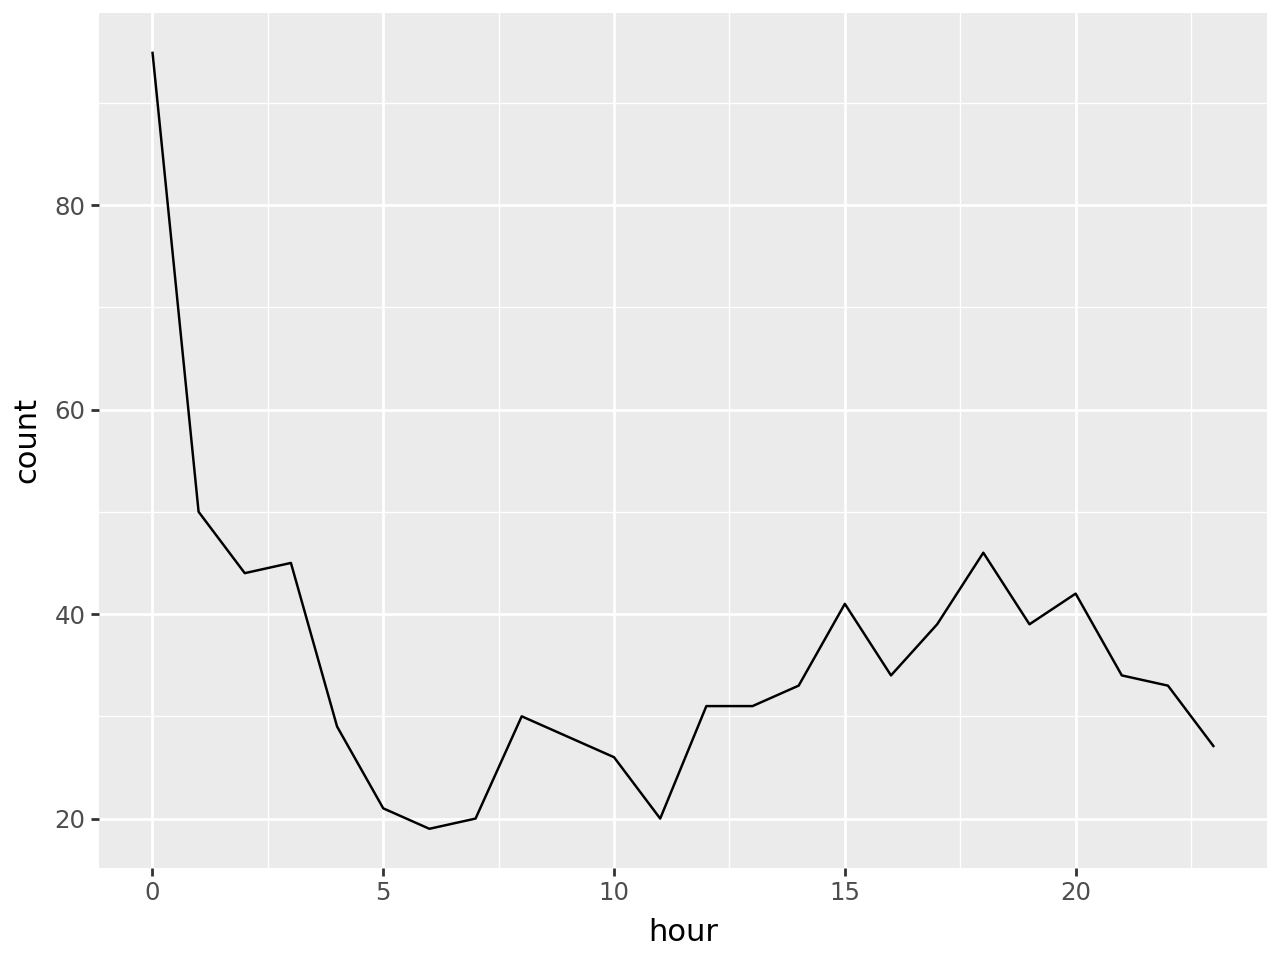

In [ ]:
from plotnine import * 

# Extract the hour from the time_create field
# We'll also calculate a time period of day for later yse
cfs = cfs >> mutate(
    hour = _.time_create.dt.hour,
    time_period = case_when({
        ((_.hour >= 0) & (_.hour <= 5)): "Night",
        ((_.hour >= 6) & (_.hour <= 11)): "Morning",
        ((_.hour >= 12) & (_.hour <= 17)): "Afternoon",
        ((_.hour >= 18) & (_.hour <= 23)): "Evening"
    })
)

# And in Python, of course we need to re-arrange
cfs = cfs >> select(
    _["nopd_item":"time_create"], 
    _.hour, _.time_period,
    _["time_dispatch":"latitude"]
)

hourly_sum = cfs["hour"].count_table() \
    >> arrange(_.hour)

# We can use ggplot() from {plotnine} + geom_line()
ggplot(hourly_sum, aes(x = "hour", y = "count")) + \
    geom_line()

In [533]:
# Let's look at those time periods too
cfs["time_period"].count_table().affiche()

╔═════════════╦═══════╦═════════╗
║ time_period ║ count ║ percent ║
╠═════════════╬═══════╬═════════╣
║ Night       ║ 284   ║ 33%     ║
║ Evening     ║ 221   ║ 26%     ║
║ Afternoon   ║ 209   ║ 24%     ║
║ Morning     ║ 143   ║ 17%     ║
╚═════════════╩═══════╩═════════╝


#### 4. What are the most common call dispositions?

In [625]:
cfs["disposition_text"].count_table().affiche()

╔═════════════════════════════╦═══════╦═════════╗
║ disposition_text            ║ count ║ percent ║
╠═════════════════════════════╬═══════╬═════════╣
║ Necessary action taken      ║ 436   ║ 51%     ║
║ Report to follow            ║ 174   ║ 20%     ║
║ Gone on arrival             ║ 170   ║ 20%     ║
║ Void                        ║ 36    ║ 4%      ║
║ Duplicate                   ║ 31    ║ 4%      ║
║ Referred to external agency ║ 6     ║ 1%      ║
║ Unfounded                   ║ 3     ║ <1%     ║
║ Canceled by complainant     ║ 1     ║ <1%     ║
╚═════════════════════════════╩═══════╩═════════╝


#### 5. Which police districts receive the most calls?

In [626]:
cfs["police_district"].count_table().affiche()

╔═════════════════╦═══════╦═════════╗
║ police_district ║ count ║ percent ║
╠═════════════════╬═══════╬═════════╣
║ 8               ║ 193   ║ 23%     ║
║ 3               ║ 137   ║ 16%     ║
║ 7               ║ 119   ║ 14%     ║
║ 1               ║ 101   ║ 12%     ║
║ 6               ║ 89    ║ 10%     ║
║ 2               ║ 79    ║ 9%      ║
║ 5               ║ 76    ║ 9%      ║
║ 4               ║ 55    ║ 6%      ║
║ NA              ║ 8     ║ 1%      ║
╚═════════════════╩═══════╩═════════╝


#### 6. What proportion of calls are self-initiated?

In [627]:
cfs["self_initiated"].count_table().affiche()

╔════════════════╦═══════╦═════════╗
║ self_initiated ║ count ║ percent ║
╠════════════════╬═══════╬═════════╣
║ False          ║ 646   ║ 75%     ║
║ True           ║ 211   ║ 25%     ║
╚════════════════╩═══════╩═════════╝


#### 7. Where do most calls originate from?

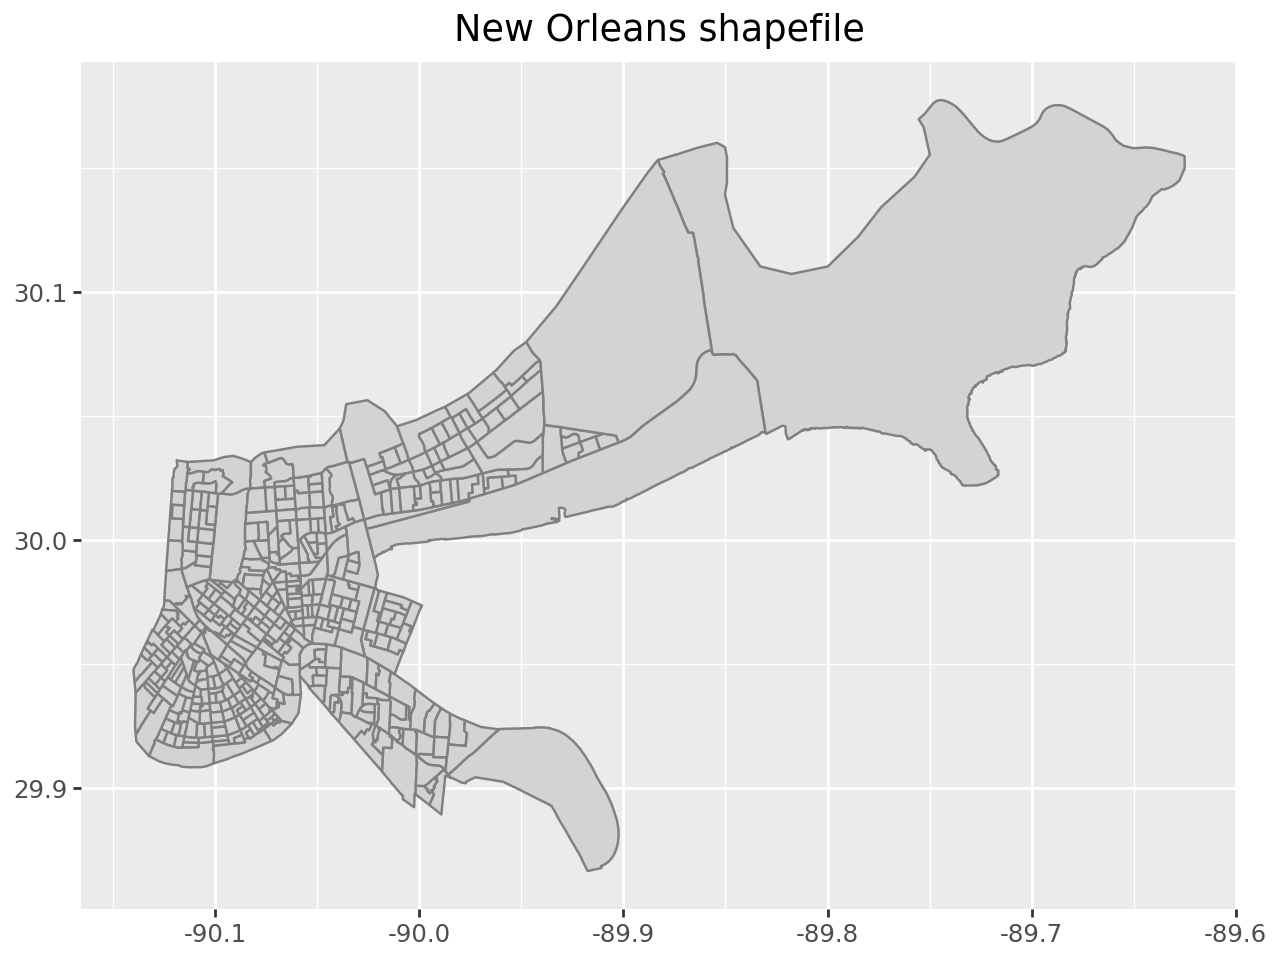

In [ ]:
import geopandas as gp

# Read shapefile and filter to Orleans Parish
# As well as filter out water-only polygons
shapes = gp.read_file("./data/shapes/tl_2024_22_bg.shp") \
    >> filter(_.COUNTYFP == "071") \
    >> filter(~_.GEOID.astype("string").str.contains("220719900000|220719801001", regex = True))
    
# Preview the orleans shapes map
ggplot(shapes, aes()) + \
  geom_map(fill = "lightgrey", color = "grey") + \
  labs(title = "New Orleans shapefile")

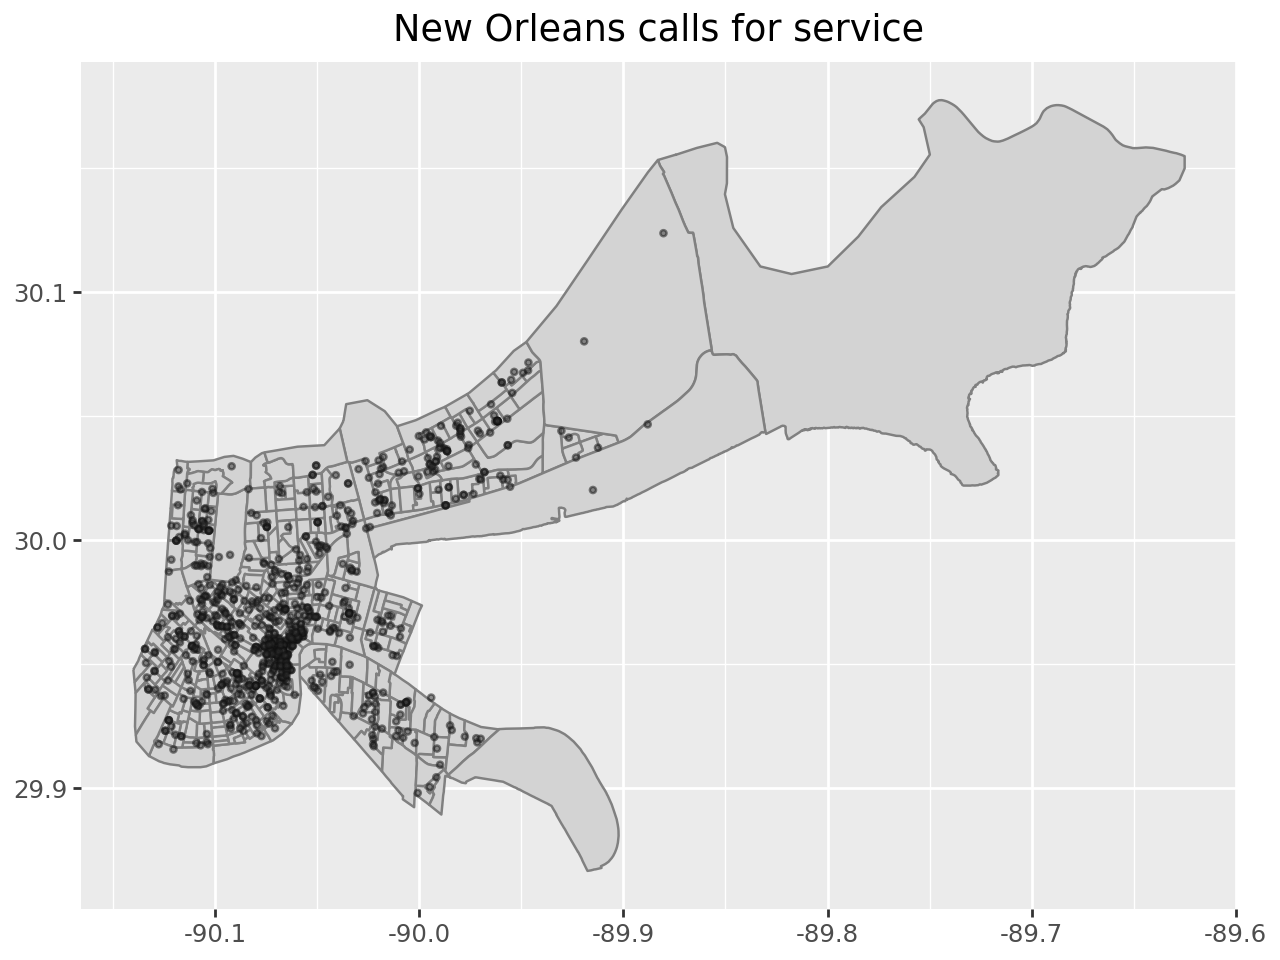

In [538]:
# Convert the cfs object to a geopandas (gp) object
cfs_gp = gp.GeoDataFrame(cfs, 
                         geometry = gp.points_from_xy(cfs.longitude, cfs.latitude), 
                         crs = "EPSG:4326")

# Look at the shapes map with cfs overlaid
ggplot() + \
  geom_map(data = shapes, fill = "lightgrey", color = "grey") + \
  geom_map(data = cfs_gp, alpha = .5, size = .75) + \
  labs(title = "New Orleans calls for service") 

#### 8. What is the best predictor of response time?

In [560]:
# Note: I only included variables that were statistically significant for readability
# As well as convert response time to a true numeric column (in seconds)
# And drop NAs
data = cfs \
    >> select(_.category, _.priority_desc, _.time_period, _.response_time, 
              _.self_initiated, _.police_district) \
    >> mutate(response_time = _.response_time.dt.seconds) \
    >> _.dropna()
    
# We'll also convert our object columns to categories
obj_cols = ["category", "priority_desc", "time_period", "police_district"]

for col in obj_cols:
    data[col] = data[col].astype("category")
         
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 1 to 855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   category         406 non-null    category
 1   priority_desc    406 non-null    category
 2   time_period      406 non-null    category
 3   response_time    406 non-null    float64 
 4   self_initiated   406 non-null    bool    
 5   police_district  406 non-null    category
dtypes: bool(1), category(4), float64(1)
memory usage: 9.3 KB


In [561]:
import statsmodels.formula.api as smf

# Fit a multiple linear regression model
model = smf.ols(
    formula = "response_time ~ category + priority_desc + time_period + \
        self_initiated + police_district", 
    data = data)

# TO-DO: Invesitage why model outputs differ
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     4.859
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           4.21e-09
Time:                        12:43:34   Log-Likelihood:                -4271.8
No. Observations:                 406   AIC:                             8578.
Df Residuals:                     389   BIC:                             8646.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In